In [1]:
## Script for generating an dataset including all information about all samples and libraries

# Load Libraries

In [2]:
import scanpy as sc
import anndata as an
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scanorama
import datetime
from datetime import datetime
import os
import pprint
import multiprocessing
import pandas as pd
from matplotlib import pyplot
from scipy.stats import pearsonr
import multiprocessing
import random
import time
import git
import sys
from datetime import date

# Load Data

## Configurations

### Technical configurations

In [3]:
multiprocessing.cpu_count()  ### total amount of cpu on the used core

96

In [4]:
len(os.sched_getaffinity(0)) ### amount of available cpus

24

In [5]:
sc.settings.n_jobs   # default number of CPUs to use for parallel computing

1

In [6]:
sc.settings.max_memory  # maximum memory to use in GB

15

In [7]:
random.seed(7)

In [8]:
ncore = '24'

In [9]:
random_state_var = 0

In [10]:
n_jobs_var = 24

In [11]:
os.environ["OMP_NUM_THREADS"] = ncore
os.environ["OPENBLAS_NUM_THREADS"] = ncore
os.environ["MKL_NUM_THREADS"] = ncore
os.environ["VECLIB_MAXIMUM_THREADS"] = ncore
os.environ["NUMEXPR_NUM_THREADS"] = ncore

In [12]:
sc.logging.print_versions()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 0

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.8.1
sinfo       0.3.4
-----
PIL                 8.3.1
annoy               NA
anyio               NA
attr                21.2.0
babel               2.9.1
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
brotli              NA
certifi             2021.05.30
cffi                1.14.6
chardet             4.0.0
charset_normalizer  2.0.0
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
decorator           5.0.9
defusedxml       

In [13]:
file_name = 'B1_Simple_Concat_Integration_after_seperate_Pre_Processing.ipynb'

In [14]:
repo = git.Repo('stark-stemi')

### Parameters

In [15]:
data_path = '../data/current'

In [16]:
data_path

'../data/current'

In [17]:
libraries =['0001', '0002', '0003', '0004', '0005', '0006', '0007', '0008', '0009', '0010', '0011', '0012', '0013', '0014'] # reduced to only 4 libraries for testing # reduced to only 4 libraries for testing

In [18]:
libraries_text = ['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10', 'L11', 'L12', 'L13', 'L14']

In [19]:
libraries_dict = {'0001': 'L1', '0002': 'L2', '0003': 'L3', '0004': 'L4', '0005': 'L5',  '0006': 'L6', '0007': 'L7', '0008': 'L8', '0009': 'L9', '0010': 'L10', '0011': 'L11', '0012': 'L12', '0013': 'L13', '0014': 'L14'}

## Meta-Data File

In [20]:
path = data_path + "/preprocessed-data/meta-data/Mapping_Hashtag_Sample.csv"
library_hashtag_mapping = pd.read_csv(path) 
print('Last modified' + time.ctime(os.path.getmtime(path)))

Last modifiedThu Sep  2 13:17:03 2021


In [21]:
# library_hashtag_mapping

## RNA Data from A7

In [22]:
anndata_dict = dict.fromkeys(libraries_text)

In [23]:
anndata_dict_raw = dict.fromkeys(libraries_text)   # get a dictionary containing the original raw data 

In [24]:
for key in anndata_dict:
    dataset_path = data_path + "/analysis/A/A7_Processed_" + key + '_rna_Final.h5ad'
    
    print(dataset_path)
    print('Last modified' + time.ctime(os.path.getmtime(dataset_path)))
    
    adata_orig = sc.read_h5ad(dataset_path)
    
    anndata_dict[key]= adata_orig # save anndata in dictionary
    anndata_dict[key].uns['data_load_time'] = time.ctime(os.path.getmtime(dataset_path))  # save the last modified timestamp of the data loaded
    anndata_dict[key].uns['data_load_name'] = dataset_path # save the data path of the data loaded 

    anndata_dict_raw[key] = anndata_dict[key].raw.to_adata()
    anndata_dict_raw[key].uns['data_load_time'] = time.ctime(os.path.getmtime(dataset_path))  # save the last modified timestamp of the data loaded
    anndata_dict_raw[key].uns['data_load_name'] = dataset_path # save the data path of the data loaded 
    

../data/current/analysis/A/A7_Processed_L1_rna_Final.h5ad
Last modifiedFri Jan 20 21:38:37 2023
../data/current/analysis/A/A7_Processed_L2_rna_Final.h5ad
Last modifiedFri Jan 20 21:38:40 2023
../data/current/analysis/A/A7_Processed_L3_rna_Final.h5ad
Last modifiedFri Jan 20 21:38:43 2023
../data/current/analysis/A/A7_Processed_L4_rna_Final.h5ad
Last modifiedFri Jan 20 21:38:47 2023
../data/current/analysis/A/A7_Processed_L5_rna_Final.h5ad
Last modifiedFri Jan 20 21:38:51 2023
../data/current/analysis/A/A7_Processed_L6_rna_Final.h5ad
Last modifiedFri Jan 20 21:38:54 2023
../data/current/analysis/A/A7_Processed_L7_rna_Final.h5ad
Last modifiedFri Jan 20 21:38:57 2023
../data/current/analysis/A/A7_Processed_L8_rna_Final.h5ad
Last modifiedFri Jan 20 21:39:01 2023
../data/current/analysis/A/A7_Processed_L9_rna_Final.h5ad
Last modifiedFri Jan 20 21:39:04 2023
../data/current/analysis/A/A7_Processed_L10_rna_Final.h5ad
Last modifiedFri Jan 20 21:39:07 2023
../data/current/analysis/A/A7_Processed

In [25]:
### Short data check

In [26]:
anndata_dict['L1']  # cells have been filtered based on QC metrics

AnnData object with n_obs × n_vars = 18549 × 21407
    obs: 'nCount_HTO', 'nFeature_HTO', 'nCount_RNA', 'nFeature_RNA', 'percent_mt', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'HTO_classification_final', 'name', 'library', 'id', 'read', 'pattern', 'sequence', 'feature_type', 'Unnamed: 7', 'in_sample', 'display_name', 'group', 'HTO_Doublet_Classification', 'doublet_score', 'predicted_doublet', 'A5_scrublet_predicted_doublet_lib0.1', 'A5_scrublet_doublet_score_lib_0.1', 'A5_scrublet_predicted_doublet_lib0.2', 'A5_scrublet_doublet_score_lib_0.2', 'A5_scrublet_predicted_doublet_lib', 'A5_scrublet_doublet_score_lib', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'valid_cell_filter_dying', 'valid_cell_filter_doublet', 'A7_PCA_50_10_neighbors_cluster', 'A7_PCA_100_10_neighbors_cluster', 'A7_PCA_100_50_neighbors_cluster', 'A7_PCA_500_50_neighbors_cluster', 'A7_Singlet_PCA_50_10_neighbors_cluste

In [27]:
anndata_dict['L1'].X.sum(axis=1) # data was normalized and log-transformed


matrix([[2192.7395],
        [1646.0859],
        [2101.9817],
        ...,
        [2003.8291],
        [1930.2568],
        [2271.1406]], dtype=float32)

In [28]:
anndata_dict_raw['L1'].X.sum(axis=1) # original raw count data

matrix([[6685.],
        [3167.],
        [7907.],
        ...,
        [4105.],
        [4064.],
        [7343.]], dtype=float32)

# Concatenate in one anndata object

In [29]:
anndata = list(anndata_dict.values())

In [30]:
anndata_raw = list(anndata_dict_raw.values())

In [31]:
# anndata

In [32]:
adata_complete = anndata[0].concatenate(
    anndata[1:14],
    batch_key="library_id",
    batch_categories = anndata_dict.keys(),
    uns_merge="unique"
)

In [33]:
adata_complete_raw = anndata_raw[0].concatenate(
    anndata_raw[1:14],
    batch_key="library_id",
    batch_categories = anndata_dict.keys(),
    uns_merge="unique"
)

In [34]:
adata_complete ## all combined

AnnData object with n_obs × n_vars = 289075 × 19208
    obs: 'nCount_HTO', 'nFeature_HTO', 'nCount_RNA', 'nFeature_RNA', 'percent_mt', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'HTO_classification_final', 'name', 'library', 'id', 'read', 'pattern', 'sequence', 'feature_type', 'Unnamed: 7', 'in_sample', 'display_name', 'group', 'HTO_Doublet_Classification', 'doublet_score', 'predicted_doublet', 'A5_scrublet_predicted_doublet_lib0.1', 'A5_scrublet_doublet_score_lib_0.1', 'A5_scrublet_predicted_doublet_lib0.2', 'A5_scrublet_doublet_score_lib_0.2', 'A5_scrublet_predicted_doublet_lib', 'A5_scrublet_doublet_score_lib', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'valid_cell_filter_dying', 'valid_cell_filter_doublet', 'A7_PCA_50_10_neighbors_cluster', 'A7_PCA_100_10_neighbors_cluster', 'A7_PCA_100_50_neighbors_cluster', 'A7_PCA_500_50_neighbors_cluster', 'A7_Singlet_PCA_50_10_neighbors_clust

In [35]:
adata_complete_raw

AnnData object with n_obs × n_vars = 289075 × 19221
    obs: 'nCount_HTO', 'nFeature_HTO', 'nCount_RNA', 'nFeature_RNA', 'percent_mt', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'HTO_classification_final', 'name', 'library', 'id', 'read', 'pattern', 'sequence', 'feature_type', 'Unnamed: 7', 'in_sample', 'display_name', 'group', 'HTO_Doublet_Classification', 'doublet_score', 'predicted_doublet', 'A5_scrublet_predicted_doublet_lib0.1', 'A5_scrublet_doublet_score_lib_0.1', 'A5_scrublet_predicted_doublet_lib0.2', 'A5_scrublet_doublet_score_lib_0.2', 'A5_scrublet_predicted_doublet_lib', 'A5_scrublet_doublet_score_lib', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'valid_cell_filter_dying', 'valid_cell_filter_doublet', 'A7_PCA_50_10_neighbors_cluster', 'A7_PCA_100_10_neighbors_cluster', 'A7_PCA_100_50_neighbors_cluster', 'A7_PCA_500_50_neighbors_cluster', 'A7_Singlet_PCA_50_10_neighbors_clust

# Statistics on concatenated object

In [36]:
#### Violin plots for combined qc metrics distributions; calculated based 

/home/icb/corinna.losert/miniconda3/envs/stark_stemi_Python/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'HTO_maxID' as categorical
/home/icb/corinna.losert/miniconda3/envs/stark_stemi_Python/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'HTO_secondID' as categorical
/home/icb/corinna.losert/miniconda3/envs/stark_stemi_Python/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inpl

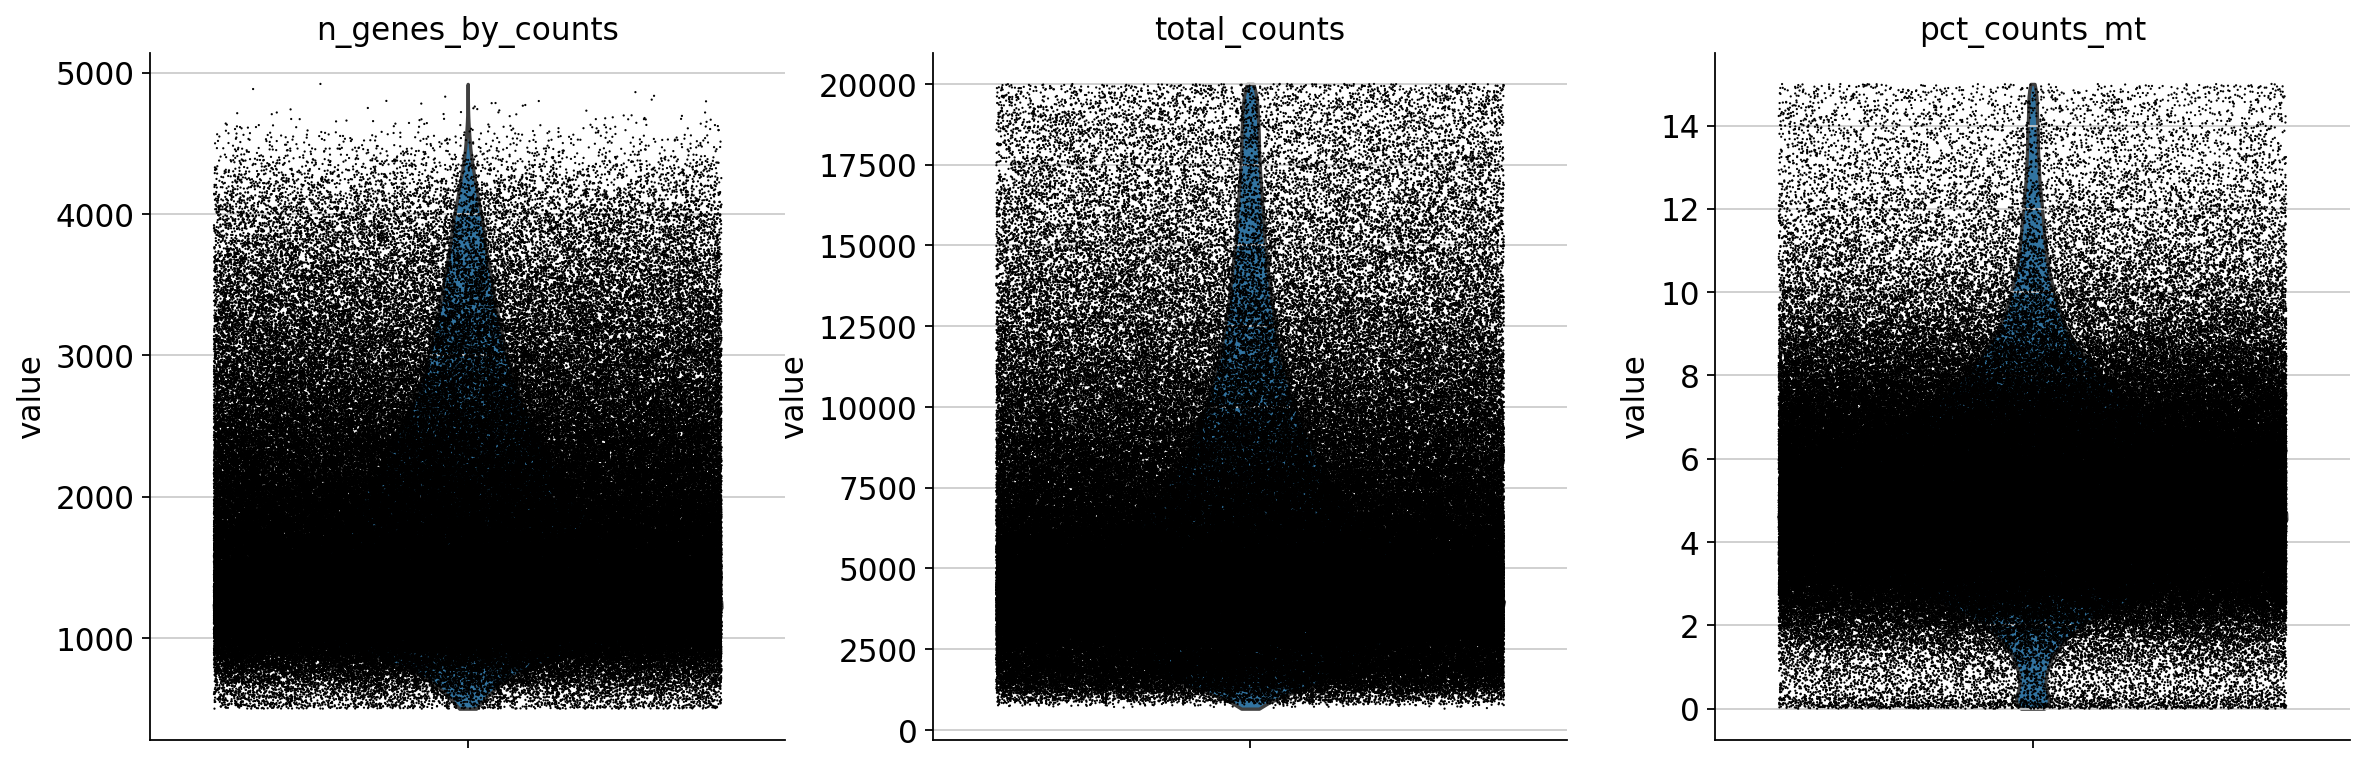

In [37]:
sc.pl.violin(adata_complete, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

/home/icb/corinna.losert/miniconda3/envs/stark_stemi_Python/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'HTO_maxID' as categorical
/home/icb/corinna.losert/miniconda3/envs/stark_stemi_Python/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'HTO_secondID' as categorical
/home/icb/corinna.losert/miniconda3/envs/stark_stemi_Python/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inpl

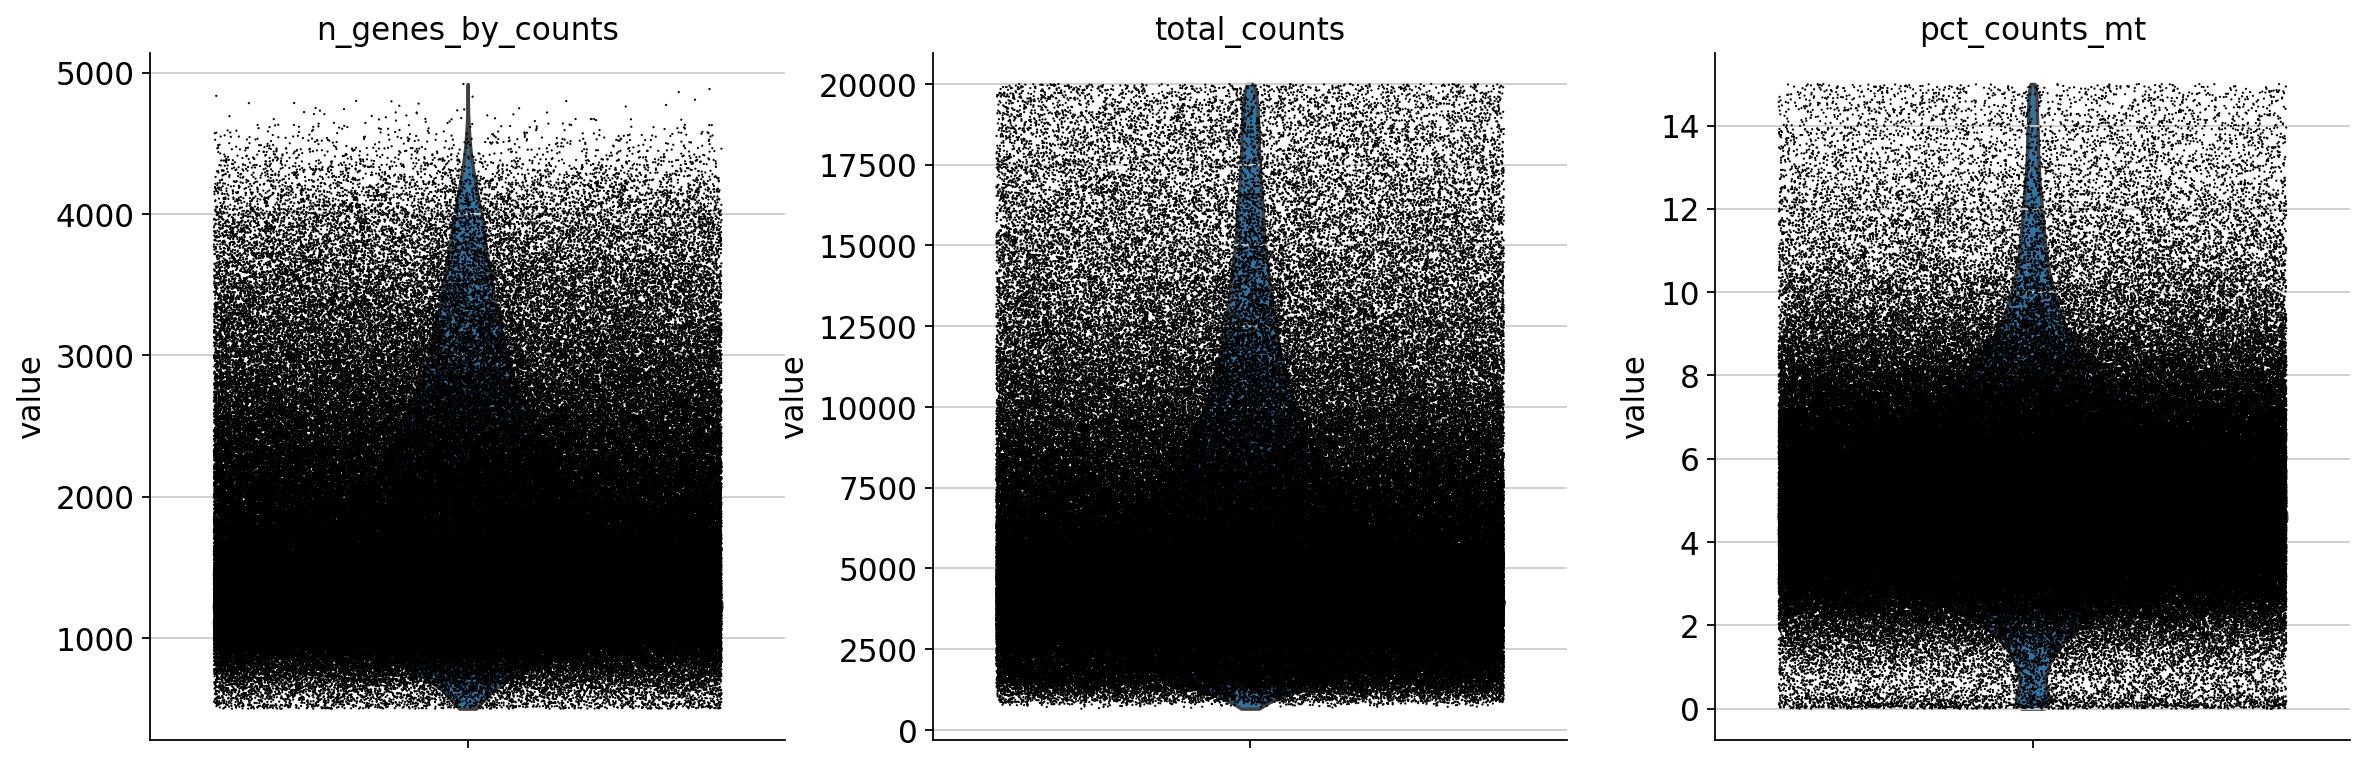

In [38]:
sc.pl.violin(adata_complete_raw, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [39]:
### check out highly variable genes

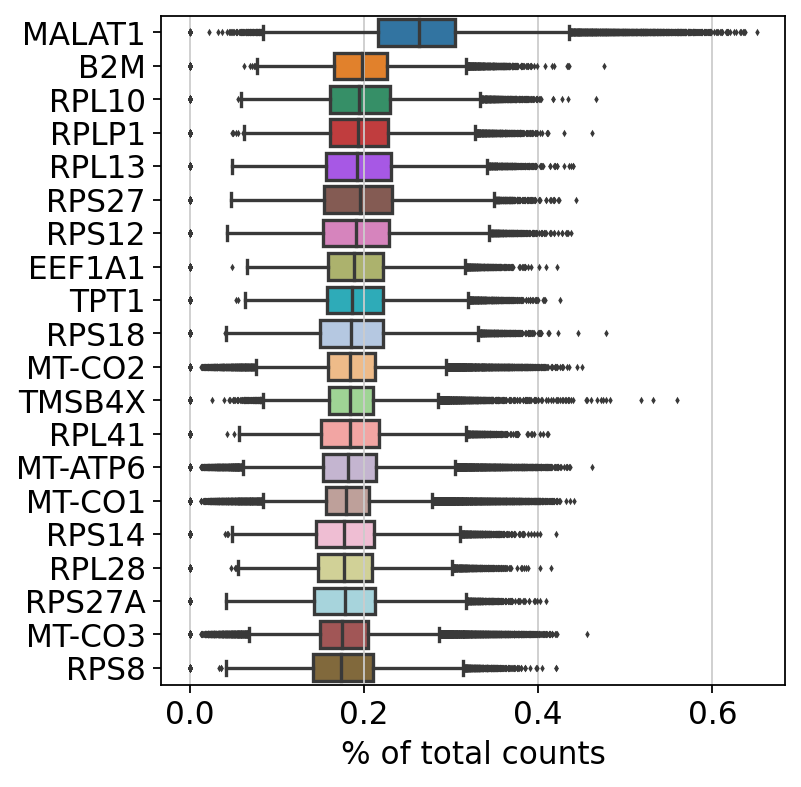

In [40]:
sc.pl.highest_expr_genes(adata_complete, n_top=20) 

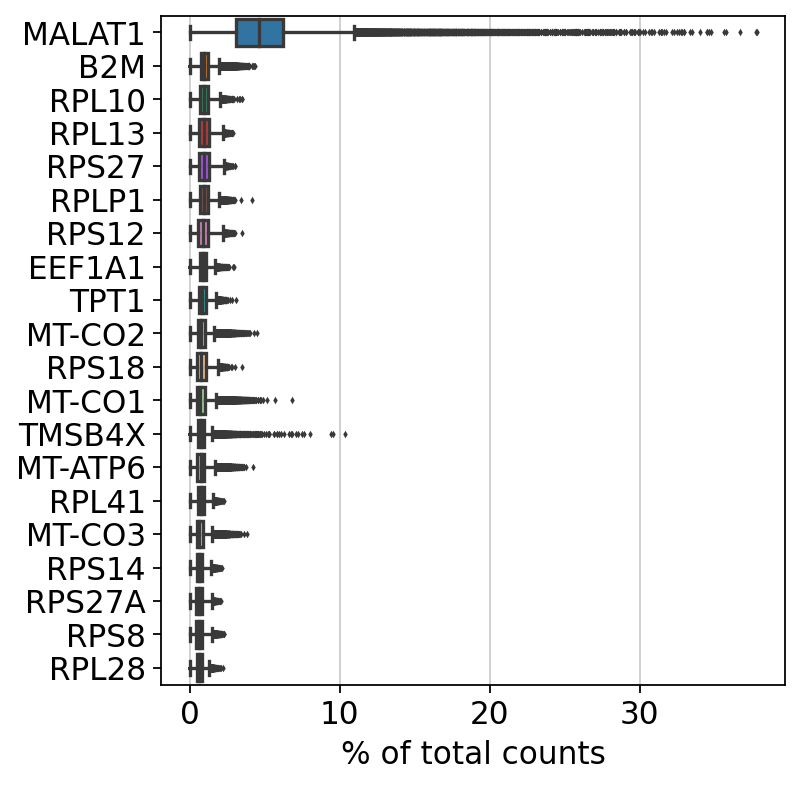

In [41]:
sc.pl.highest_expr_genes(adata_complete_raw, n_top=20) 

In [42]:
### check out highly variable genes without mitochondrial + ribosomal genes

/home/icb/corinna.losert/miniconda3/envs/stark_stemi_Python/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


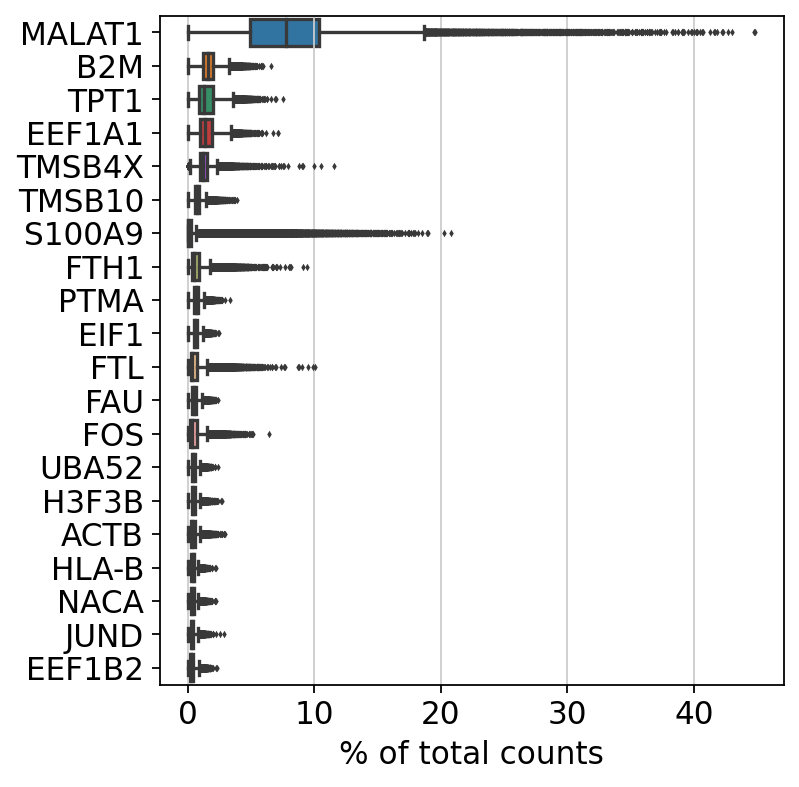

In [43]:
sc.pl.highest_expr_genes(adata_complete_raw[:,np.logical_and(adata_complete_raw.var['rb'] == False , adata_complete_raw.var['mt'] == False)] , n_top=20,  show = True)  

In [44]:
# adata_complete

# Save integrated object

In [48]:
### convert column to right format

In [46]:
adata_complete.obs['A5_scrublet_predicted_doublet_lib0.2'] =adata_complete.obs['A5_scrublet_predicted_doublet_lib0.2'].apply(str)

In [47]:
adata_complete_raw.obs['A5_scrublet_predicted_doublet_lib0.2'] =adata_complete_raw.obs['A5_scrublet_predicted_doublet_lib0.2'].apply(str)

In [49]:
data_name = data_path + '/analysis/B/' +  'B1_Integrated_Concat_processed_rna.h5ad'

print(data_name)
print('Last modified' + date.today().strftime("%m/%d/%Y, %H:%M:%S"))   

adata_complete.uns['data_save_time'] = date.today().strftime("%m/%d/%Y, %H:%M:%S") # save the last modified timestamp of the data saved
adata_complete.uns['data_save_name'] = data_name # save the data path of the data loaded 

working_directory = os.getcwd()
repo.index.add([working_directory + '/' + file_name])
commit = repo.index.commit('Save data '+ data_name + ' '+ date.today().strftime("%m/%d/%Y, %H:%M:%S") )
print(commit)

adata_complete.write(data_name)


../data/current/analysis/B/B1_Integrated_Concat_processed_rna.h5ad
Last modified01/21/2023, 00:00:00


/home/icb/corinna.losert/miniconda3/envs/stark_stemi_Python/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'A5_scrublet_predicted_doublet_lib0.2' as categorical


5db2f011ce84af350362b7c03d7fef7e7ac062c1


In [50]:
data_name = data_path + '/analysis/B/' +  'B1_Integrated_Concat_raw_rna.h5ad'

print(data_name)
print('Last modified' + date.today().strftime("%m/%d/%Y, %H:%M:%S"))   

adata_complete_raw.uns['data_save_time'] = date.today().strftime("%m/%d/%Y, %H:%M:%S") # save the last modified timestamp of the data saved
adata_complete_raw.uns['data_save_name'] = data_name # save the data path of the data loaded 

adata_complete_raw.write(data_name)

commit = repo.index.commit('Save data '+ data_name + ' '+ date.today().strftime("%m/%d/%Y, %H:%M:%S") )
print(commit)


/home/icb/corinna.losert/miniconda3/envs/stark_stemi_Python/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'A5_scrublet_predicted_doublet_lib0.2' as categorical


../data/current/analysis/B/B1_Integrated_Concat_raw_rna.h5ad
Last modified01/21/2023, 00:00:00
0cef17f82bc3a9bf9f0da1d67add0d0063a0f031
